# Importing spatial data

In [3]:
print("Hello world")

Hello world


## Import packages

In [1]:
import sys
print(sys.version)

import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.optim as optim
from torch import nn
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor

import os
import pandas as pd

# import PIL 
# import torchvision.transforms
# import osgeo
import rasterio

3.11.8 | packaged by conda-forge | (main, Feb 16 2024, 20:40:50) [MSC v.1937 64 bit (AMD64)]


In [2]:
# list the .tif files in the folder
for root, dirs, files in os.walk('../'):
    for file in files:
        if file.endswith('.tif'):
            print(file)

buffalo2005_canopy_cover_cent1000.tif
buffalo2005_ndvi_cent.tif
buffalo2005_ndvi_cent1000.tif
buffalo2005_pres1000.tif
buffalo2005_slope_cent1000.tif
buffalo2005_veg_herby_cent1000.tif
buffalo_canopy_cent50x50_n10000.tif
buffalo_canopy_cent_n10000.tif
buffalo_herby_cent50x50_n10000.tif
buffalo_herby_cent_n10000.tif
buffalo_ndvi_cent50x50_n10000.tif
buffalo_ndvi_cent_n10000.tif
buffalo_pres_cent50x50_n10000.tif
buffalo_pres_cent_n10000.tif
buffalo_slope_cent50x50_n10000.tif
buffalo_slope_cent_n10000.tif
buffalo2005_ndvi_cent.tif
CLR_TS_2pDailyMemALL_naive_unnorm_hourly_2024-02-29.tif
CLR_TS_2pDailyMemALL_naive_unnorm_hourly_2024-03-04.tif
canopy_cover.tif
ndvi_GEE_projected_watermask20230207.tif
slope_raster.tif
veg_herby.tif


## NDVI

In [3]:
# Path to your TIF file
file_path = '../buffalo_ndvi_cent50x50_n10000.tif'

# Using rasterio 
with rasterio.open(file_path) as ndvi:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    ndvi_stack = ndvi.read([i for i in range(1, ndvi.count + 1)])


In [5]:
ndvi_stack
print(ndvi_stack.shape)
ndvi_stack.dtype
ndvi_stack.size

ndvi_tens = torch.from_numpy(ndvi_stack)
ndvi_tens.shape
torch.mean(ndvi_tens)

(10000, 100, 100)


tensor(0.3054)

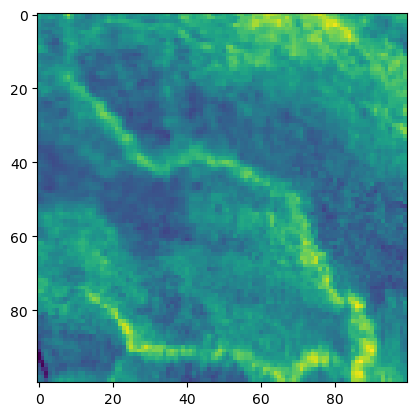

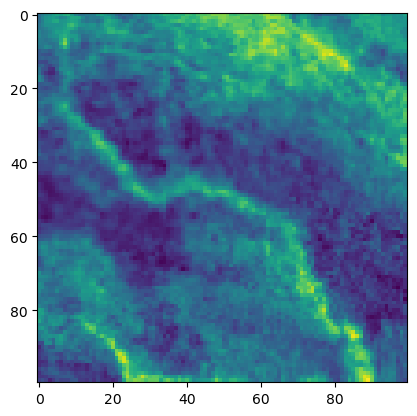

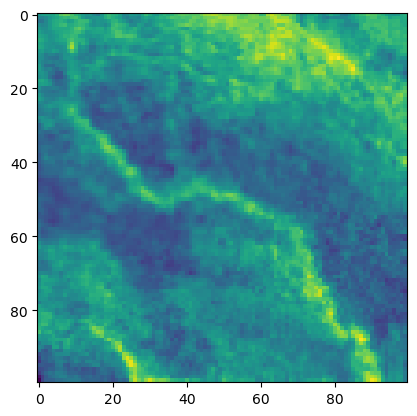

In [6]:
for i in range(0, 3):
    plt.imshow(ndvi_stack[i])
    plt.show()

## Canopy cover

In [8]:
# Path to your TIF file
file_path = '../buffalo_canopy_cent50x50_n10000.tif'

# Using rasterio 
with rasterio.open(file_path) as canopy:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    canopy_stack = canopy.read([i for i in range(1, canopy.count + 1)])

print(canopy_stack.shape)

(10000, 100, 100)


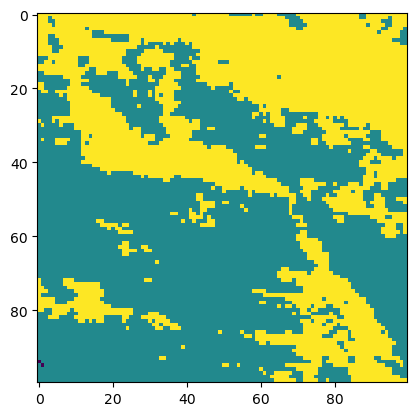

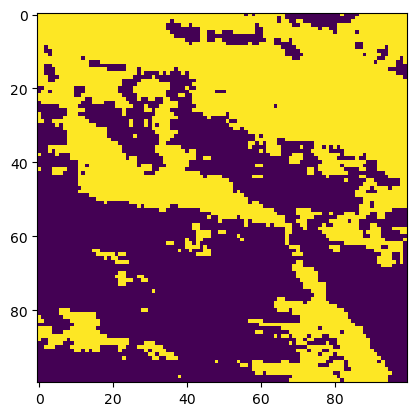

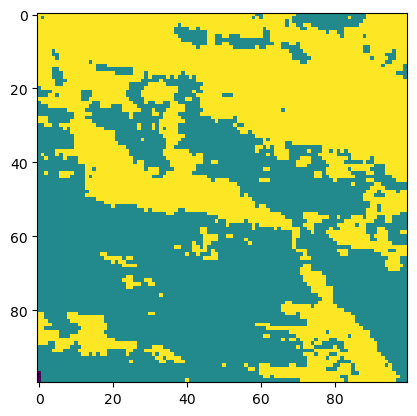

In [9]:
for i in range(0, 3):
    plt.imshow(canopy_stack[i])
    plt.show()

## Herbaceous vegetation

In [10]:
# Path to your TIF file
file_path = '../buffalo_herby_cent50x50_n10000.tif'

# Using rasterio 
with rasterio.open(file_path) as herby:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    herby_stack = herby.read([i for i in range(1, herby.count + 1)])

print(herby_stack.shape)      

(10000, 100, 100)


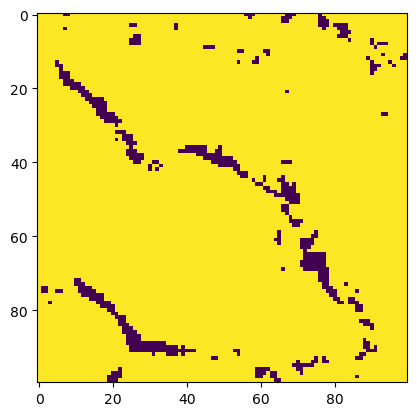

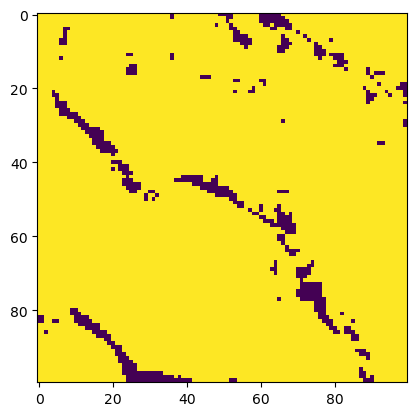

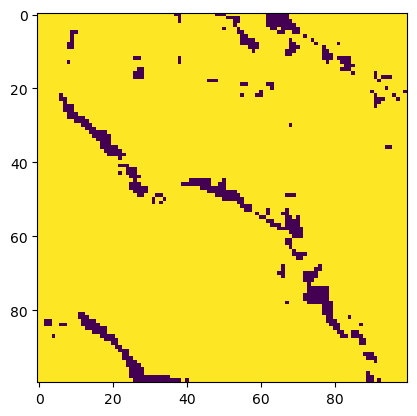

In [11]:
for i in range(0, 3):
    plt.imshow(herby_stack[i])
    plt.show()

## Slope

In [12]:
# Path to your TIF file
file_path = '../buffalo_slope_cent50x50_n10000.tif'

# Using rasterio 
with rasterio.open(file_path) as slope:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    slope_stack = slope.read([i for i in range(1, slope.count + 1)])

print(slope_stack.shape)

(10000, 100, 100)


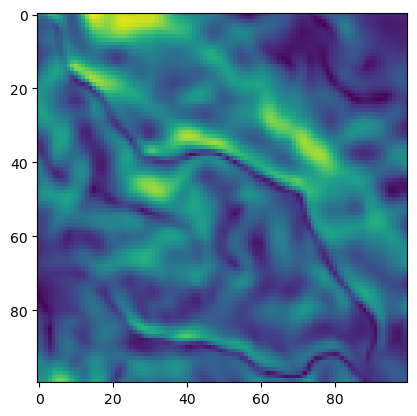

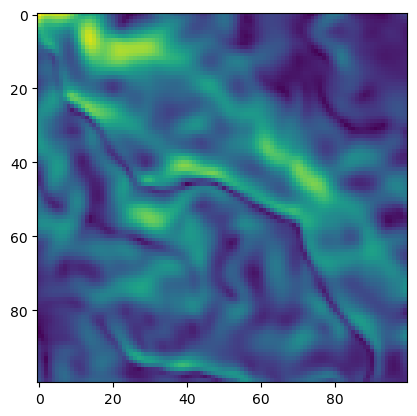

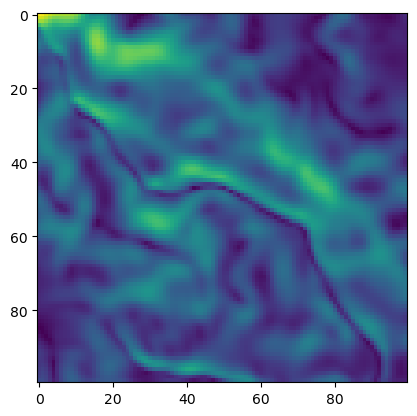

In [13]:
for i in range(0, 3):
    plt.imshow(slope_stack[i])
    plt.show()

## Presence records - target of model

In [14]:
# Path to your TIF file
file_path = '../buffalo_pres_cent50x50_n10000.tif'

# Using rasterio 
with rasterio.open(file_path) as pres:
    # Read all layers/channels into a single numpy array
    # rasterio indexes channels starting from 1, hence the range is 1 to src.count + 1
    pres_stack = pres.read([i for i in range(1, pres.count + 1)])

print(pres_stack.shape)

(10000, 100, 100)


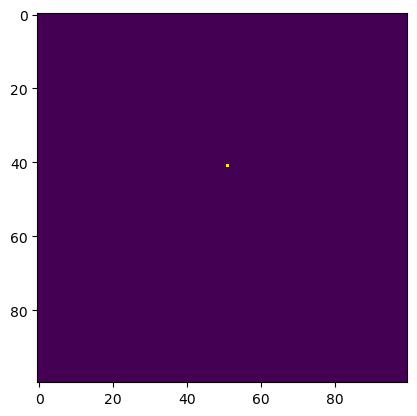

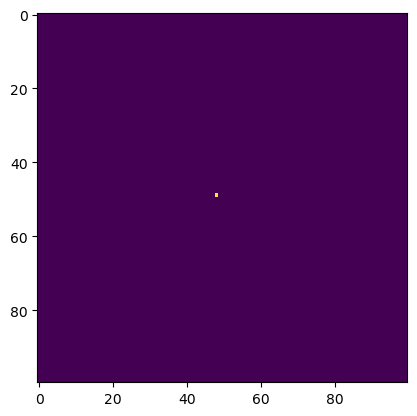

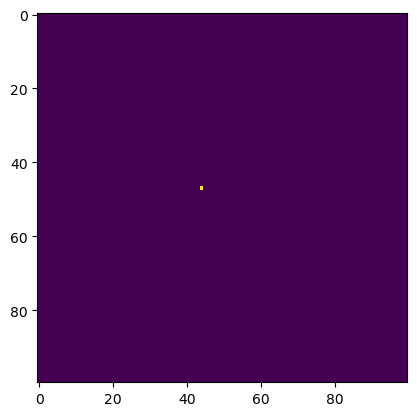

In [15]:
for i in range(0, 3):
    plt.imshow(pres_stack[i])
    plt.show()

Find the index of the occupied cell

In [20]:
# pres_stack

# Find the coordinates of the 1
coordinates = np.where(pres_stack[0] == 1)
print(coordinates)
x, y = coordinates[0][0], coordinates[1][0]
print(x, y)


(array([41], dtype=int64), array([51], dtype=int64))
41 51
4151


In [ ]:

# Convert coordinates to single index for CrossEntropyLoss
index = x * 100 + y
print(index)

Now do for all locations

In [21]:
# Iterate over all the layers in the stack and store the coordinates of the 1
indices = []
for i in range(0, pres.count-1):
    coordinates = np.where(pres_stack[i] == 1)
    x, y = coordinates[0][0], coordinates[1][0]
    index = x * 100 + y
    indices.append(index)


IndexError: index 0 is out of bounds for axis 0 with size 0

In [22]:
print(indices)
# how many entries in indices
print(len(indices))

[18301, 19898, 19494, 20302, 19692, 20098, 24102, 19899, 20099, 18490, 19265, 19497, 18898, 19899, 19900, 20099, 20895, 22906, 20316, 20100, 20099, 19900, 20717, 23515, 15732, 18093, 18481, 19293, 20292, 22707, 20099, 19900, 20100, 20099, 18693, 16882, 21092, 18699, 20294, 20100, 20099, 19109, 20504, 21914, 19506, 20102, 20492, 19899, 19898, 22508, 19899, 20099, 20097, 23078, 20100, 20099, 20285, 18701, 20710, 20103, 20099, 19900, 20099, 19899, 20100, 19899, 23117, 21913, 15329, 20097, 14265, 22300, 19900, 20100, 20697, 22085, 22710, 19908, 19303, 20100, 20099, 19899, 20092, 19501, 20099, 20099, 22697, 20504, 20502, 19696, 19711, 9489, 20098, 22698, 19900, 20099, 19900, 20100, 17704, 22297, 20097, 20100, 19899, 20099, 19900, 20100, 20099, 21495, 26300, 19906, 20102, 20302, 16128, 16694, 24286, 20100, 20099, 19899, 21481, 20683, 20896, 20698, 19501, 20907, 18300, 15491, 19900, 20099, 20099, 19900, 20099, 18308, 17708, 18713, 20303, 21308, 20700, 18696, 20497, 20686, 20097, 20100, 19900,

In [23]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


# Starting to build up a model

Combing the data into a TensorDataSet

In [24]:
print(indices[0:800])

[18301, 19898, 19494, 20302, 19692, 20098, 24102, 19899, 20099, 18490, 19265, 19497, 18898, 19899, 19900, 20099, 20895, 22906, 20316, 20100, 20099, 19900, 20717, 23515, 15732, 18093, 18481, 19293, 20292, 22707, 20099, 19900, 20100, 20099, 18693, 16882, 21092, 18699, 20294, 20100, 20099, 19109, 20504, 21914, 19506, 20102, 20492, 19899, 19898, 22508, 19899, 20099, 20097, 23078, 20100, 20099, 20285, 18701, 20710, 20103, 20099, 19900, 20099, 19899, 20100, 19899, 23117, 21913, 15329, 20097, 14265, 22300, 19900, 20100, 20697, 22085, 22710, 19908, 19303, 20100, 20099, 19899, 20092, 19501, 20099, 20099, 22697, 20504, 20502, 19696, 19711, 9489, 20098, 22698, 19900, 20099, 19900, 20100, 17704, 22297, 20097, 20100, 19899, 20099, 19900, 20100, 20099, 21495, 26300, 19906, 20102, 20302, 16128, 16694, 24286, 20100, 20099, 19899, 21481, 20683, 20896, 20698, 19501, 20907, 18300, 15491, 19900, 20099, 20099, 19900, 20099, 18308, 17708, 18713, 20303, 21308, 20700, 18696, 20497, 20686, 20097, 20100, 19900,

Combine the spatial layers into channels

In [26]:
# Stack the channels along a new axis; here, 1 is commonly used for channel axis in PyTorch
combined_stack = np.stack([ndvi_stack, canopy_stack, herby_stack, slope_stack], axis=1)
combined_stack

array([[[[ 0.44965553,  0.44081554,  0.42086905, ...,  0.44316724,
           0.44591576,  0.446807  ],
         [ 0.32476035,  0.27380553,  0.2439384 , ...,  0.42314404,
           0.4258184 ,  0.43078426],
         [ 0.39640832,  0.37839735,  0.37689996, ...,  0.40142706,
           0.41444743,  0.4318716 ],
         ...,
         [ 0.22186664,  0.21639411,  0.22193761, ...,  0.3680298 ,
           0.3620664 ,  0.36583683],
         [ 0.23731117,  0.22093447,  0.21453406, ...,  0.38553426,
           0.38548118,  0.3904469 ],
         [ 0.25021452,  0.22992933,  0.21601503, ...,  0.3922347 ,
           0.40688384,  0.40996838]],

        [[57.5       , 57.5       , 57.5       , ..., 57.5       ,
          57.5       , 57.5       ],
         [32.5       , 57.5       , 57.5       , ..., 57.5       ,
          57.5       , 57.5       ],
         [57.5       , 57.5       , 57.5       , ..., 57.5       ,
          57.5       , 57.5       ],
         ...,
         [57.5       , 57.5       

In [27]:
# set up some hyperparameters
bs = 8

# Convert to a torch tensor (if using as a target for loss calculation)
# target = torch.tensor([indices], dtype=torch.long)

train_ds = TensorDataset(torch.from_numpy(combined_stack[0:800]), torch.tensor(indices[0:800], dtype=torch.long))
print(train_ds)
print(train_ds.tensors)
train_dl = DataLoader(train_ds, batch_size=bs, shuffle = True)

test_ds = TensorDataset(torch.from_numpy(combined_stack[800:999]), torch.tensor(indices[800:999], dtype=torch.long))
# print(train_ds)
# print(train_ds.tensors)
test_dl = DataLoader(test_ds, batch_size=bs, shuffle = True)


(tensor([[[[ 0.4497,  0.4408,  0.4209,  ...,  0.4432,  0.4459,  0.4468],
          [ 0.3248,  0.2738,  0.2439,  ...,  0.4231,  0.4258,  0.4308],
          [ 0.3964,  0.3784,  0.3769,  ...,  0.4014,  0.4144,  0.4319],
          ...,
          [ 0.2219,  0.2164,  0.2219,  ...,  0.3680,  0.3621,  0.3658],
          [ 0.2373,  0.2209,  0.2145,  ...,  0.3855,  0.3855,  0.3904],
          [ 0.2502,  0.2299,  0.2160,  ...,  0.3922,  0.4069,  0.4100]],

         [[57.5000, 57.5000, 57.5000,  ..., 57.5000, 57.5000, 57.5000],
          [32.5000, 57.5000, 57.5000,  ..., 57.5000, 57.5000, 57.5000],
          [57.5000, 57.5000, 57.5000,  ..., 57.5000, 57.5000, 57.5000],
          ...,
          [57.5000, 57.5000, 57.5000,  ..., 57.5000, 57.5000, 57.5000],
          [57.5000, 57.5000, 57.5000,  ..., 57.5000, 57.5000, 57.5000],
          [57.5000, 57.5000, 57.5000,  ..., 57.5000, 57.5000, 57.5000]],

         [[ 1.0000,  1.0000,  1.0000,  ...,  0.0000,  0.0000,  0.0000],
          [ 1.0000,  1.0000, 

In [28]:
print(train_dl)
print(train_dl.dataset.tensors[0].shape)
print(test_dl.dataset.tensors[0].shape)

print(train_dl.dataset.tensors[1].shape)
print(test_dl.dataset.tensors[1].shape)

torch.Size([800, 4, 200, 200])
torch.Size([199, 4, 200, 200])
torch.Size([800])
torch.Size([199])


Define the model class

In [73]:
class ConvNeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            # input Nx4x200x200, output Nx16x200x200
            nn.Conv2d(in_channels=4, out_channels=16, kernel_size=3, stride=1, padding=1),
            # same dimensions
            nn.ReLU(),
            # will reduce dimensions by half to Nx16x100x100
            nn.MaxPool2d(kernel_size=2, stride=2),
            # input Nx16x100x100, output Nx32x100x100
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            # same dimensions
            nn.ReLU(),
            # will reduce dimensions by half to Nx32x50x50
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(1,-1),
            nn.Linear(80000, 1000),
            nn.Dropout(),
            nn.ReLU(),
            nn.Linear(1000, 1000),
            nn.ReLU(),
            nn.Linear(1000, 1000),
            nn.Dropout(),
            nn.ReLU(),
            nn.Linear(1000, 40000)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)

        # when using MSE
        # pred_probab = nn.Softmax(dim=1)(logits)
        # return pred_probab
    
        return logits

Take a look at the model's structure

In [46]:
help(nn.Flatten)

Help on class Flatten in module torch.nn.modules.flatten:

class Flatten(torch.nn.modules.module.Module)
 |  Flatten(start_dim: int = 1, end_dim: int = -1) -> None
 |  
 |  Flattens a contiguous range of dims into a tensor.
 |  
 |  For use with :class:`~nn.Sequential`, see :meth:`torch.flatten` for details.
 |  
 |  Shape:
 |      - Input: :math:`(*, S_{\text{start}},..., S_{i}, ..., S_{\text{end}}, *)`,'
 |        where :math:`S_{i}` is the size at dimension :math:`i` and :math:`*` means any
 |        number of dimensions including none.
 |      - Output: :math:`(*, \prod_{i=\text{start}}^{\text{end}} S_{i}, *)`.
 |  
 |  Args:
 |      start_dim: first dim to flatten (default = 1).
 |      end_dim: last dim to flatten (default = -1).
 |  
 |  Examples::
 |      >>> input = torch.randn(32, 1, 5, 5)
 |      >>> # With default parameters
 |      >>> m = nn.Flatten()
 |      >>> output = m(input)
 |      >>> output.size()
 |      torch.Size([32, 25])
 |      >>> # With non-default parame

In [74]:
input = torch.randn(32, 5, 5, 5)
# With default parameters
m = nn.Flatten(1,-1)
output = m(input)
output.size()

torch.Size([32, 125])

In [75]:
model = ConvNeuralNetwork().to(device)
print(model)

ConvNeuralNetwork(
  (linear_relu_stack): Sequential(
    (0): Conv2d(4, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=80000, out_features=1000, bias=True)
    (8): Dropout(p=0.5, inplace=False)
    (9): ReLU()
    (10): Linear(in_features=1000, out_features=1000, bias=True)
    (11): ReLU()
    (12): Linear(in_features=1000, out_features=1000, bias=True)
    (13): Dropout(p=0.5, inplace=False)
    (14): ReLU()
    (15): Linear(in_features=1000, out_features=40000, bias=True)
  )
)


In [76]:
X = torch.rand(1, 4, 200, 200, device=device)
# logits = model(X)
pred_probab = model(X)
# pred_probab = nn.Softmax(dim=1)(logits)
# y_pred = pred_probab.argmax(1)
# print(f"Predicted class: {y_pred}")

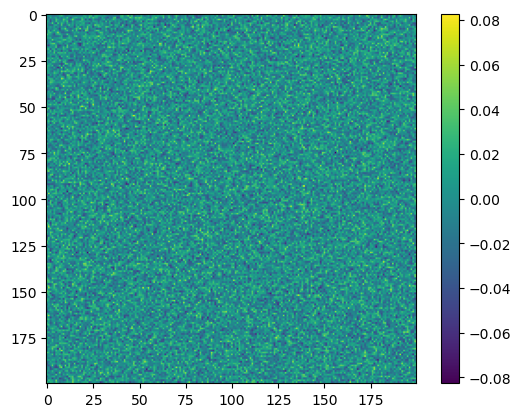

In [77]:
pred_probab

image = pred_probab.view(200, 200).detach().cpu().numpy()
plt.imshow(image)  # 'cmap' can be adjusted based on your data
plt.colorbar()  # Optionally add a colorbar to see the scale
# plt.title('Output Image')
plt.show()

In [53]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([16, 4, 3, 3]) | Values : tensor([[[[ 0.0729,  0.1294,  0.0031],
          [ 0.0167, -0.0078, -0.0851],
          [ 0.0107, -0.0491, -0.1620]],

         [[-0.0886, -0.1603, -0.0929],
          [-0.1071,  0.1356,  0.1112],
          [-0.0821,  0.1240,  0.0323]],

         [[ 0.1666, -0.1303, -0.1009],
          [ 0.1259,  0.0837,  0.0167],
          [ 0.1401, -0.0672,  0.1070]],

         [[-0.0900,  0.0856,  0.1428],
          [ 0.0077,  0.0993, -0.1138],
          [-0.0277,  0.1478,  0.1586]]],


        [[[-0.1253, -0.1171, -0.1483],
          [-0.1230, -0.0678,  0.0134],
          [-0.0946, -0.1354,  0.1110]],

         [[-0.1504, -0.1392, -0.0969],
          [ 0.0944,  0.0784, -0.0569],
          [-0.0040,  0.0579, -0.1234]],

         [[ 0.0927, -0.0189,  0.0229],
          [ 0.0684,  0.0682, -0.0367],
          [-0.0389, -0.1176,  0.0565]],

         [[-0.0162, -0.1349,  0.1168],
          [-0.0451,  0.0978,  0.0375],
        

In [78]:
# Initialize the loss function
# loss_fn = nn.MSELoss()
# loss_fn = nn.L1Loss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [46]:
(b, c) = next(iter(train_dl))
print(b, c)

tensor([[[0.2846, 0.2747, 0.2776,  ..., 0.3330, 0.3383, 0.3410],
         [0.2754, 0.2733, 0.2696,  ..., 0.3338, 0.3427, 0.3543],
         [0.2597, 0.2534, 0.2429,  ..., 0.3092, 0.3293, 0.3514],
         ...,
         [0.2437, 0.2464, 0.2509,  ..., 0.4094, 0.4217, 0.4518],
         [0.2548, 0.2541, 0.2830,  ..., 0.4535, 0.3969, 0.4175],
         [0.3084, 0.2976, 0.3250,  ..., 0.4369, 0.3963, 0.4243]],

        [[0.4181, 0.3968, 0.4138,  ..., 0.4583, 0.4510, 0.4519],
         [0.4279, 0.4413, 0.4775,  ..., 0.4569, 0.4492, 0.4441],
         [0.4299, 0.4455, 0.4622,  ..., 0.4305, 0.4244, 0.4377],
         ...,
         [0.2897, 0.2744, 0.2614,  ..., 0.3549, 0.3578, 0.3470],
         [0.2905, 0.2766, 0.2633,  ..., 0.3495, 0.3648, 0.3640],
         [0.3069, 0.2970, 0.2767,  ..., 0.3450, 0.3759, 0.3810]],

        [[0.3968, 0.4138, 0.4652,  ..., 0.4510, 0.4519, 0.4742],
         [0.4413, 0.4775, 0.4838,  ..., 0.4492, 0.4441, 0.4571],
         [0.4455, 0.4622, 0.4815,  ..., 0.4244, 0.4377, 0.

In [80]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # Set the model to training mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # Flatten the target tensor 'y'
        # y_flattened = y.view(y.shape[0], -1)

        # Compute prediction and loss
        # pred = model(X)
        # loss = loss_fn(pred, y_flattened)
        # loss = loss_fn(model(X), y.view(y.shape[0], -1))

        # with cross entropy loss
        loss = loss_fn(model(X), y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 10 == 0:
            loss, current = loss.item(), batch * bs + len(X)
            print(f"loss: {loss:>15f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            # pred = model(X)
            # test_loss += loss_fn(model(X), y.view(y.shape[0], -1)).item()
            # correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            # with cross entropy loss
            test_loss += loss_fn(model(X), y)

    test_loss /= num_batches
    # correct /= size
    # print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
    print(f"Avg loss: {test_loss:>15f} \n")

In [81]:
# learning_rate = 1e-1
batch_size = bs # does not actually affect the batch size - this should be changed prior to creating the dataloader object
epochs = 10

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dl, model, loss_fn, optimizer)
    test_loop(test_dl, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss:       10.598680  [    8/  800]
loss:        9.730344  [   88/  800]
loss:        9.288959  [  168/  800]
loss:        9.025679  [  248/  800]
loss:        9.272411  [  328/  800]
loss:        9.896232  [  408/  800]
loss:        8.816919  [  488/  800]
loss:        8.028294  [  568/  800]
loss:        9.799724  [  648/  800]
loss:        7.705218  [  728/  800]
Avg loss:        7.210015 

Epoch 2
-------------------------------
loss:        8.493445  [    8/  800]
loss:        5.972714  [   88/  800]
loss:        7.461005  [  168/  800]
loss:        4.976445  [  248/  800]
loss:        8.025572  [  328/  800]
loss:        6.482508  [  408/  800]
loss:        4.252271  [  488/  800]
loss:        8.018628  [  568/  800]
loss:        6.766723  [  648/  800]
loss:        3.699444  [  728/  800]
Avg loss:        6.652029 

Epoch 3
-------------------------------
loss:        7.645794  [    8/  800]
loss:        5.427519  [   88/  800]
loss:     

KeyboardInterrupt: 

In [82]:
print(model.state_dict())

OrderedDict([('linear_relu_stack.0.weight', tensor([[[[-0.0173, -0.0641, -0.1467],
          [ 0.1112, -0.1363, -0.1563],
          [-0.1695, -0.0087, -0.0583]],

         [[-0.0526, -0.0120,  0.0245],
          [ 0.1206,  0.1147, -0.0201],
          [ 0.1098, -0.1393, -0.1101]],

         [[-0.0596,  0.0106,  0.1243],
          [-0.0483, -0.1416, -0.0859],
          [ 0.0839, -0.1075, -0.0279]],

         [[-0.1000, -0.1758,  0.0540],
          [-0.0861,  0.0676, -0.1425],
          [ 0.1434, -0.0749, -0.1010]]],


        [[[ 0.0476,  0.0654,  0.0353],
          [-0.1065,  0.0133, -0.1006],
          [-0.1085, -0.0544, -0.0477]],

         [[ 0.1345,  0.0153, -0.0255],
          [ 0.0839, -0.0905, -0.1169],
          [-0.0762,  0.0068, -0.0423]],

         [[-0.0792,  0.0247,  0.1484],
          [ 0.0503,  0.0985,  0.0185],
          [-0.0110,  0.1680, -0.0563]],

         [[-0.1278,  0.0983, -0.1292],
          [-0.0723,  0.1471, -0.0139],
          [-0.0588, -0.0289,  0.0248]]],




In [83]:
# 1. Set the model in evaluation mode
model.eval()

# 2. Setup the inference mode context manager
# with torch.inference_mode():
#   # 3. Make sure the calculations are done with the model and data on the same device
#   # in our case, we haven't setup device-agnostic code yet so our data and model are
#   # on the CPU by default.
#   # model_0.to(device)
#   # X_test = X_test.to(device)
#   y_preds = model(X_test)
# y_preds

with torch.no_grad():
  logits = model(X)
logits

# logits = nn.Softmax(dim=1)(logits)


tensor([[-6.0083, -5.8908, -5.7838,  ..., -6.1163, -6.1496, -5.8877]])

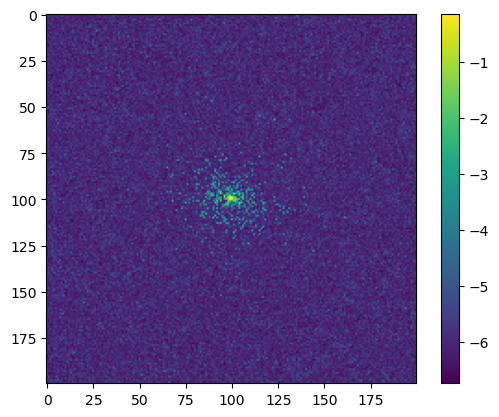

In [84]:

image = logits.view(200, 200).detach().cpu().numpy()
plt.imshow(image)  # 'cmap' can be adjusted based on your data
plt.colorbar()  # Optionally add a colorbar to see the scale
# plt.title('Output Image')
plt.show()